In [1]:
%run ./CoreFunctions.ipynb

In [2]:
playsound(444,444)

No sound available because Linux


In [3]:
# the main parameteres are collected below
# Set SaveResults to True if you want to save the results!!!

In [4]:
Grid_size = 69

In [5]:
aLowestValue = -5
aHighestValue = 5
bLowestValue = -5
bHighestValue = 5

In [6]:
aas = np.linspace(start=aLowestValue, stop=aHighestValue, num=Grid_size)   #grid of points for which 
#                                                        computation of Log(I_p/I_u) takes place
                                                  # start is the first, stop is the last, num is the number of points
bbs = np.linspace(start=bLowestValue, stop= bHighestValue, num=Grid_size)

In [7]:
# Q_values are specified below because the population has to be loaded first

In [8]:
SaveResults = False

In [9]:
#French population
Fr_Pop = pd.read_csv("summary_per_Aire_Attr_py_v55.csv")
FrPopulation = np.array(Fr_Pop["PAA"])
#FrPopulation = np.sort(FrPopulation)

N_iterations = 39 
N_cities = len(FrPopulation)
#N_cities = 4 #number of city sizes

In [10]:
#xs = list(FrPopulation)
#Duplicates = set([x for x in xs if xs.count(x) > 1])

In [11]:
#Duplicates

In [12]:
#PopList = list(set(list(FrPopulation)))

In [13]:
#FrPopulation = np.array(PopList)
#FrPopulation = np.sort(FrPopulation)

In [14]:
#plt.hist(np.log(PolPopulation), bins = 20)
#plt.title("Histogram of Log of Polish city sizes")
#plt.savefig('Hist_of_Polish_City_Sizes.png', bbox_inches='tight')
#plt.show()

In [15]:
N_iterations = 39
N_cities =  len(FrPopulation)

In [16]:
# kI  does not! affect the ratio I_p/I_u!
kI = 0.00001

In [17]:
# initialize cities array. The distribution is given manually
if False:    
    def initialize_cities_array():
        
        # zeroth column is city size y, first is beta(y), second is pi_p(y), third  pi_U(y)
        zeta      = np.zeros((N_cities, 4))
        zeta[0,0] = 1000
        zeta[1,0] = 37430
        zeta[2,0] = 200627
        zeta[3,0] = 3874465
        
        zeta[0,1] = 0.39
        zeta[1,1] = 0.51
        zeta[2,1] = 0.08
        zeta[3,1] = 0.02
        
        zeta[:,2] = 0.99 #placeholder
        zeta[:,3] = 0.99  #placeholder
    
    
        return zeta

In [18]:
# for Poland all city sizes are unique

def initialize_cities_array():
    
    # zeroth column is city size y, first is beta(y), second is pi_p(y), third  pi_U(y)
    zeta      = np.zeros((N_cities, 4))
    zeta[:,0] = FrPopulation
 
    
    zeta[:,1] = 1/N_cities
    
    zeta[:,2] = 0.99 #placeholder
    zeta[:,3] = 0.99  #placeholder


    return zeta

In [19]:
maxQ_value()

89964.23203592829

In [20]:
Q_values = np.array([21051.6]) 
# 112073 is excluded because this is the maximal possible value. Both pi_u and pi_p will be one.

#Q_values = np.concatenate([Q_values, Q_values_from_Aurelien])
#Q_values = np.array([0.01,0.5,0.99]) * maxQ_value()
print("Q_values: ")
print(Q_values)

Q_values: 
[21051.6]


In [21]:
# it can be checked here that kI does not affect the ration
#kI = 0.0001

#ick = Compute_Is(1,1,22542)
#print(ick)
#print(ick[0]/ick[1])

In [22]:
if np.max(Q_values) > maxQ_value() - 0.2:
    raise ValueError("Q_value is too high!")

In [23]:
Q_max_possible_value = maxQ_value()

In [24]:
#with open('a_boundary_curve_1st_computation.pkl', 'rb') as file2:
#    Boundary_curve_map = pickle.load(file2)

In [25]:
import matplotlib.patches as mpatches

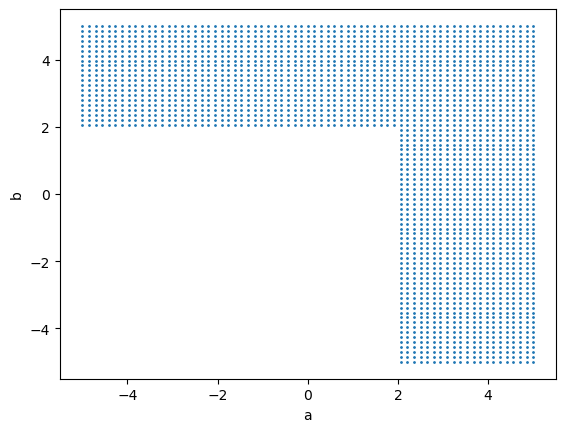

No sound available because Linux


/tmp/ipykernel_85045/2114750427.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["LogIpOverIu"][i] = math.log(ick[0]) - math.log(ick[1])


ETA for Ip and Iu computation  = 3123.8041496276855 seconds
Average number of seconds per iteration up to now = 1.2760723166995578 seconds
ETA for Ip and Iu computation  = 2334.736892517577 seconds
Average number of seconds per iteration up to now = 1.0734425064519788 seconds
ETA for Ip and Iu computation  = 1981.4634293169588 seconds
Average number of seconds per iteration up to now = 1.0417790133673865 seconds
ETA for Ip and Iu computation  = 1706.2721849679947 seconds
Average number of seconds per iteration up to now = 1.047435448653456 seconds
ETA for Ip and Iu computation  = 1415.0873525448 seconds
Average number of seconds per iteration up to now = 1.043574818473421 seconds
ETA for Ip and Iu computation  = 1119.8305158307978 seconds
Average number of seconds per iteration up to now = 1.0340079159368767 seconds
ETA for Ip and Iu computation  = 836.9458406479632 seconds
Average number of seconds per iteration up to now = 1.0332665145216238 seconds
ETA for Ip and Iu computation  = 5

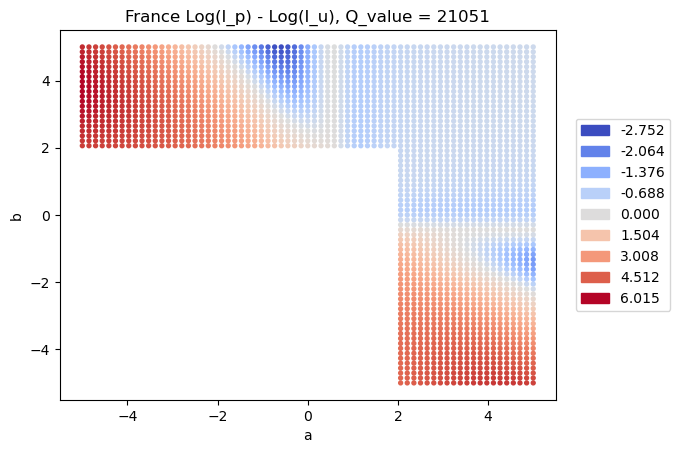

Total time for the loop over k = 2519.6242532730103 seconds
No sound available because Linux


In [26]:
startTimeForLoopOverk = time.time()

for k in range(np.shape(Q_values)[0]):
    
    Q_value = Q_values[k]
    # get cartesian product of aas and bbs
    df = pd.MultiIndex.from_product([aas, bbs], names = ["a", "b"])
    df = pd.DataFrame(index = df).reset_index()
    zeros = np.zeros(( df.shape[0],1))
    df["LogIpOverIu"] = zeros  
    df = df.sample(frac=1).reset_index(drop=True)  #shuffle rows
    
    df = df[(df['a'] > 2) | (df['b'] > 2) ].reset_index()
    if k == 0:
        plt.scatter(df["a"], df["b"], s=1)
        plt.ylabel('b')
        plt.xlabel('a')
        plt.show()

        playsound(340, 1111)
    
    


    startTime = time.time()
    
    for i in range(df.shape[0]):
        ick = Compute_Is(df["a"][i], df["b"][i], Q_value)
        df["LogIpOverIu"][i] = math.log(ick[0]) - math.log(ick[1])
        
        if  i%273 == 8:
            print("ETA for Ip and Iu computation  = " +
                      str( (df.shape[0] - i - 1) *(time.time() - startTime)/(i+1) ) + " seconds")
            print("Average number of seconds per iteration up to now = "
                  + str((time.time() - startTime)/(i+1)) + " seconds")
            
    print("Total time for the loop = " + str(time.time() - startTime) + " seconds")
    print("Average number of seconds per iteration for the loop = "
          + str((time.time() - startTime)/(i+1)) + " seconds")
    
    playsound(440, 1111)
    
    Color_var = np.array(df["LogIpOverIu"]) 

    MinValue = np.min(Color_var)
    MaxValue = np.max(Color_var)

    scaled_Color_var = np.zeros(np.shape(Color_var))

    for i in range(np.shape(Color_var)[0]): 
        # colors are scaled piece-wisely linear in such a way that scaled_Color_var[i] = 0 if 
        # Color_var[i] = 0. In this way if df["LogIpOverIu"][i] = 0, the color is gonna be in the middle between red and blue.
        z = Color_var[i]

        if z < 0:
            scaled_Color_var[i] = 0.5 - 0.5*z/MinValue  
        else:
            scaled_Color_var[i] = 0.5 + 0.5*z/MaxValue 


    colors = plt.cm.coolwarm(scaled_Color_var)

    def inverse_color_transform(s):
        if s >= 0.5:
            return_value = MaxValue*(2*s-1)
        else:
            return_value = MinValue*(1-2*s)
        return return_value    
    
    plt.scatter(df["a"], df["b"],  color=colors, s=7.8)
    plt.ylabel('b')
    plt.xlabel('a')
    plt.title('France Log(I_p) - Log(I_u), Q_value = ' + str(int(Q_value//1)))


    patches = []

    Numbers_from_0_to_1 = np.linspace(start = 0, stop = 1, num = 9)

    for i in range(np.shape(Numbers_from_0_to_1)[0]):
        patches.append(mpatches.Patch(color=plt.cm.coolwarm(Numbers_from_0_to_1[i]),
                                      label= '{0:.3f}'.format(inverse_color_transform(Numbers_from_0_to_1[i])) ) )


    plt.legend(handles=patches, bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    if SaveResults == True:
        plt.savefig('Computation over grid for France, Q = ' + str(int(Q_value//1)) + '.png', bbox_inches='tight')
    plt.show()
    
    if SaveResults == True:
        fileObj = open('df_France_Q_'  + str(int(Q_value//1)) + '.pkl', 'wb')
        pickle.dump(df,fileObj)
        fileObj.close()
        
print("Total time for the loop over k = " + str(time.time() - startTimeForLoopOverk) + " seconds")
playsound(340, 1111)

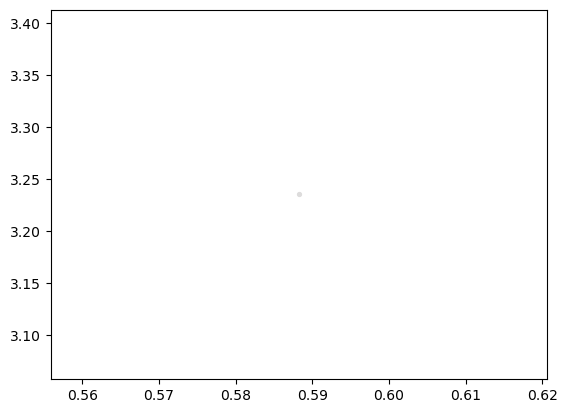

In [29]:
    plt.scatter(df["a"][abs(df["LogIpOverIu"]) < 0.00165], 
                df["b"][abs(df["LogIpOverIu"]) < 0.00165],  color=colors[abs(df["LogIpOverIu"]) < 0.00165], s=7.8)
